# Practice with the Palmer Penguins Data Set

## Exploratory Data Analysis

In the cell below, import the libraries you will need. 

1. pandas
2. seaborn

In [1]:
import pandas as pd
import seaborn as sns

## Domain Knowledge and Problem Background 

Our goal is to learn a bit about the data set before we begin. 

This link gives an overview of the data that we have access to:
[Kaggle Link for Palmer Penguin data set](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)

Download the "penguins.csv" file as a 

In [2]:
penguins_df = pd.read_csv('penguins.csv')

### Basic Information Retrieval 

Answer each of the following questions related to the Palmer Penguins data set. These will require using pandas commands to 



### Q1. How many Penguins total are in the data set? 

In [3]:
# code to answer the question here 
print('There are', penguins_df.shape[0], 'penguins.')

There are 344 penguins.


### Answer to Q1. 

### Q2. What is the longest bill observed on any penguin in this data set?

In [4]:
# code to answer the question here 
# penguins_df.loc[penguins_df['bill_length_mm'] == max(penguins_df.bill_length_mm)]

print('Longest bill was', max(penguins_df.bill_length_mm), 'mm.')

Longest bill was 59.6 mm.


### Q3. Which columns in the data frame have missing values? 

In [5]:
# code to answer the question here 
print('\033[4m%-17s | %s\033[0m' % ('Column', 'Missing Values'))
for c in penguins_df.columns:
    s = sum(penguins_df[c].isna())
    print('%-17s | %d' % (c, s))

Column            | Missing Values
species           | 0
island            | 0
bill_length_mm    | 2
bill_depth_mm     | 2
flipper_length_mm | 2
body_mass_g       | 2
sex               | 11


### Q4. How many distinct species of penguin are represented in this data set? 

In [6]:
# code to answer the question here 
print('There are', len(penguins_df['species'].unique()), 'penguin species in this dataset.')

There are 3 penguin species in this dataset.


### Q5. Which species of penguin in the data set has the largest body mass, on average? 

In [7]:
# code to answer the question here 
bm_avg = penguins_df.groupby(['species'])['body_mass_g'].mean()

### Answer to Q5. 

In [8]:
print('Gentoo penguins have the highest body mass on average.')

Gentoo penguins have the highest body mass on average.


### Q6. What is the average bill length of female Gentoo penguins only? (Hint: using the [group_by](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) may work well here). 

In [9]:
# code to answer the question here 
b_length = penguins_df.groupby(['species', 'sex'])['bill_length_mm'].mean()
print('Gentoo females have an average bill length of', '%.3f' % b_length['Gentoo']['FEMALE'], 'mm.')

Gentoo females have an average bill length of 45.564 mm.


## Visualizing the Data 

### Goal

Our goal for this data set is to build a Machine Learning model that can predict whether or not a given penguin belongs to the Gentoo species, based on its body measurements. 

### Creating Plots

There are different types of plots, for different types of variables. In general, we will be separating based on types of variables. 

1. For categorical variables, we can use boxplots to compare their distributions.
2. For numerical variables, we can use histograms to compare their distributions.
3. For pairs of numerical variables, we can use scatterplots to predict relationships between the two variables. 

### Creating Single Plots 

In [10]:
penguins_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

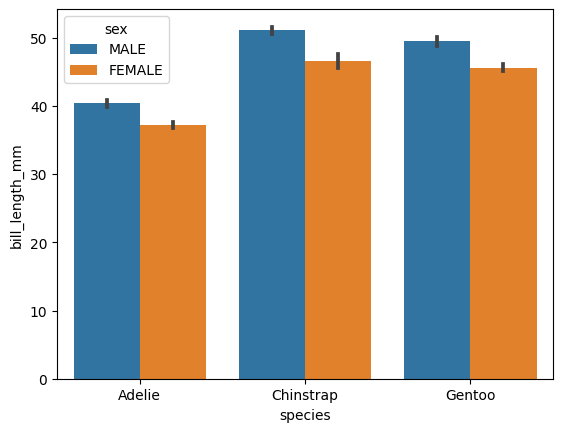

In [11]:
sns.barplot(penguins_df, x = 'species', y = 'bill_length_mm', hue = 'sex')

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

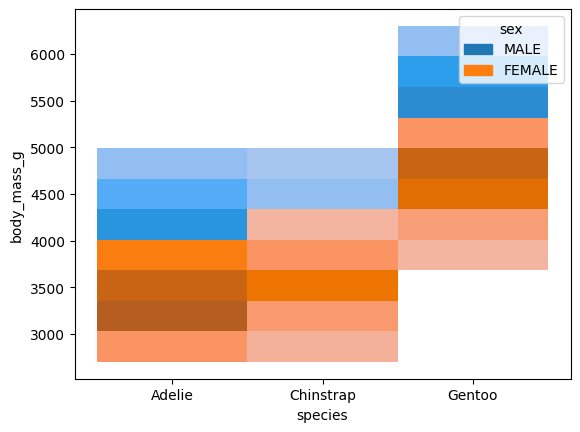

In [12]:
sns.histplot(penguins_df, x = 'species', y = 'body_mass_g', hue = 'sex')

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

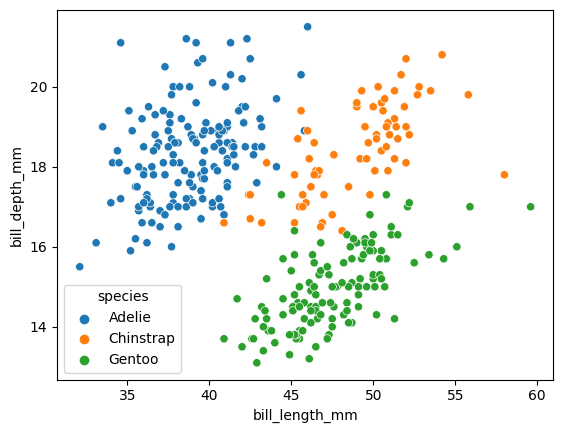

In [13]:
sns.scatterplot(penguins_df, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species')

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

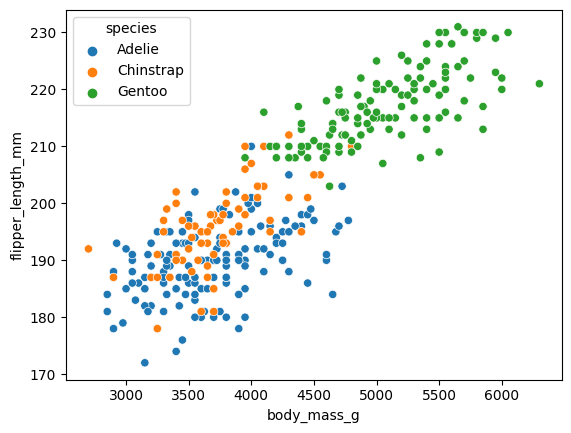

In [14]:
sns.scatterplot(penguins_df, x = 'body_mass_g', y = 'flipper_length_mm', hue = 'species')

### Using FacetGrid to Explore Relationships Between Variables 

### Using pairplots to show all variables at once 

## Building Some Machine Learning Models and See How They Do 

### Reminder: The Most Basic Process of Building a Machine Learning Model 

We are working with sklearn for now, and the most basic process of building a model on data is pretty straightforward. 

1. Load the data frame
2. Make sure it is ready to be learned (no missing values, all values are numerical)
3. Choose the type of classifier. Create an instance of your classifier. 
4. Make sure the data matches the type of assumptions for your classifier (for instance, [k-nearest neighbors classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) will require that all data be on the same scale.)
5. Separate your features and target (input variables and what we want to predict).
6. Split features and training data into training and testing using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
7. Call the ```fit``` method for your classiifer on the training data.
8. To assess how well the classifier did, call the ```score``` method (in the future we will explore more about how to determine how well the classifier performed). 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
X = pd.get_dummies(data = penguins_df.dropna()).drop(columns = ['species_Adelie', 'species_Chinstrap'])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,1,1,0,0,1,0


In [27]:
X_train, X_test = train_test_split(X, test_size = .3, random_state = 24)